<IPython.core.display.Javascript object>


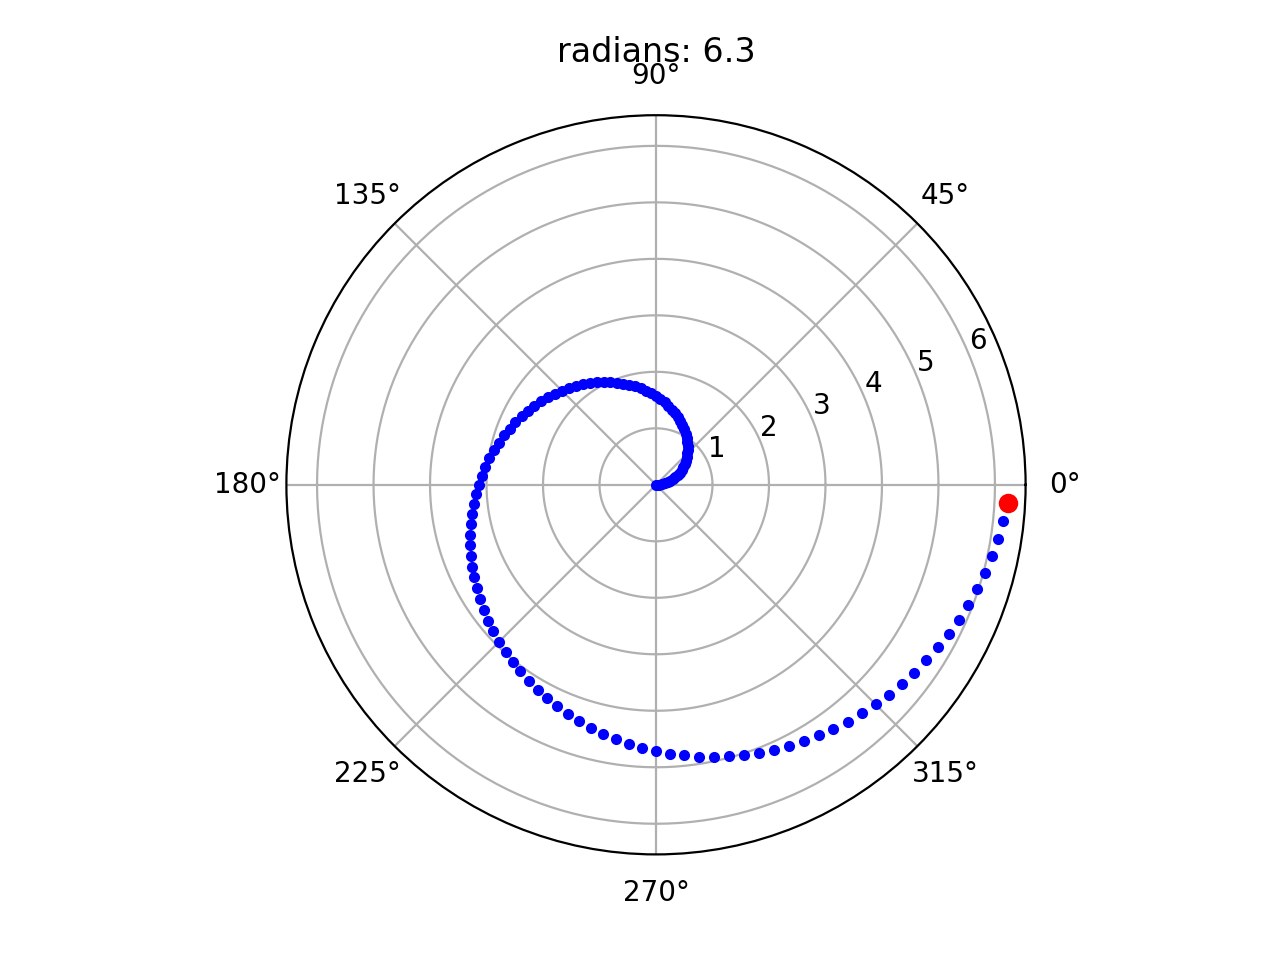

In [19]:
# Ellipse Animation 5A
# revision 5 introduces the Kepler Equation, M = E-ε sin E, where ε is eccentricity,
# M is Mean anomaly and E is Eccentric anomaly, from 
# https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Position_as_a_function_of_time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

from math import floor
%matplotlib notebook
# set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (7, 7)
# plt.rcParams['figure.dpi'] = 100

TWOPI = 2*np.pi # numpy doesn't have tau (2π)

# fig = plt.figure(figsize=(5, 10))
# fig = plt.figure(figsize=(7, 7), dpi=100)
fig = plt.figure()
ax = plt.subplot(1,1,1,projection='polar') # subplot(nrows, ncols, index, **kwargs)

# fig, ax = plt.subplots(projection='polar')

# h&k are offsets from the origin for later use when setting a star at a focus
# h = k = 0.0 # for now, the center of the ellipse is the origin
# a = 1.2     # a is the semimajor axis
# b = 0.8     # b is the semiminor axis (assuming a>b)

e = 0.0 # eccentricity of the ellipse. e = |cs|/a, where |cs| is the distance from the center to a focus (=h, assuming no tilt) and a is the semimajor axis

datastepsize = TWOPI/120
theta = np.arange(0.0, TWOPI, datastepsize) # θ values from 0 to 2π in increments of datastepsize

# cartesian:
# x = h + a*np.cos(theta)    # x values from -1 to 1
# y = h + b*np.sin(theta)    # y values from -1 to 1
# l = plt.plot(x, y,         # x,y ellipse plot
#              'b. ',        # made of blue dots--a visual check if the data points are
#             )              # evenly spaced (they shouldn't be for orbits)
# ax = plt.axis([-2,2,-2,2]) # plt.axis([xmin, xmax, ymin, ymax])
#                            # equivalent to ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# redDot, = plt.plot([x[0]], [y[0]], 'ro')

# polar:

# r = np.arange(1.0, 1.0, datastepsize) # !!!!! don't think this is right
# r = np.full(floor(TWOPI/datastepsize), 1.0) # fill an nparray of the same size as theta with all 1.0's
r = theta
# x = h + a*np.cos(theta)    # x values from -1 to 1
# y = h + b*np.sin(theta)    # y values from -1 to 1
# l = plt.plot(x, y,         # x,y ellipse plot
#              'b. ',        # made of blue dots--a visual check if the data points are
#             )              # evenly spaced (they shouldn't be for orbits)

plt.plot(theta, r, 'b. ')
# ax = plt.axis([-2,2,-2,2]) # plt.axis([xmin, xmax, ymin, ymax])
#                            # equivalent to ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

redDot, = plt.plot([theta[0]], r[0], 'ro')

# plt.plot

"""
Note that the value at x[-1] yields the last value in the numpy ndarray x.

It's the same value as x[floor(1000*TWOPI)], so when we want to reference various
values of x and y based on the iterator i with values from 0 to 2π the index of the
array x or y is the floor of 1000*i. It's times 1000 because we initially used a step
size of 1/1000 or 0.001. In the general case, it would be x[floor(i/datastepsize)].
"""

def animate(i):
#     redDot.set_data(np.cos(i), np.sin(i))
#    redDot.set_data(x[floor(i/datastepsize)], y[floor(i/datastepsize)])
#     redDot.set_data(x[floor(i/0.001)], y[floor(i/0.001)])
#     redDot.set_data(x[floor(i*1000)], y[floor(i*1000)])
    redDot.set_data(theta[floor(i/datastepsize)], r[floor(i/datastepsize)])
    plt.title('radians: {:^2.1f}'.format(i))
    return redDot,

# create animation using the animate() function

# disabling progress_callback lambda function during mybinder.org development on iPad :)

# progress_callback = lambda i, n: print(f'Saving frame {i+1} of {n}')
animation = FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.01),
                          interval=5, blit=True, repeat=False)

# animation = FuncAnimation(plt.gcf(), #get current figure or gcf
#                           update, #the function to update
#                           frames=frames, #overrides the default frames behavior of counting up i in integers from 0
#                           interval=interval,
#                           #repeat = False, #option to stop animation after one iteration
#                           repeat_delay = 2e3, #optional delay in ms; 1e3 = 1000 ms = 1 s
#                           #progress_callback=progress_callback
#                           )

# disabling saving .mp4 during mybinder.org development on iPad :)

# # from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Stephen Shadle'), bitrate=1800)
# #ani.save("/home/pi/Documents/Thonny/dynamic_image.mp4", writer=writer) #explicit directory
# animation.save("animate_ellipse.mp4", writer=writer, progress_callback=progress_callback) #current directory



In [14]:
len(theta)

120

In [15]:
len(r)

120

In [17]:
TWOPI/120

0.05235987755982988